## Assignment week 2: Multivariate linear regression

#### Made by Micha de Groot and Danny Dijkzeul

### Initialization of the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the csv file with pandas
Houses = pd.read_csv('housesRegr.csv', sep=";")

Houses.head()


,MLS,Bedrooms,Bathrooms,Size,Price
0,132842,3,3,2371,795000
1,134364,4,3,2818,399000
2,135141,4,3,3032,545000
3,135712,4,4,3540,909000
4,136282,3,1,1249,109900


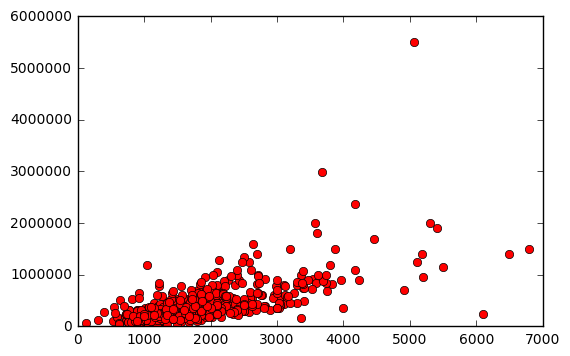

In [2]:
# A plot of the house sizes against the prices

x = Houses.Size
y = Houses.Price


plt.plot(x, y, 'ro')
plt.show()

### Functions used for calculating the cost and the learning algorithm

In [82]:
# Calculate the gradien with resprect to theta.
# Now updated and extended to accept x as a matrix, extended with x^(0) = 1
def gradient(theta, xMatrix, yVector, thetaIndex):
    gradientValue = 0
    for i in range(len(yVector)):
        gradientValue += (np.dot(theta,xMatrix[i].T) -yVector[i])*xMatrix[i][thetaIndex]
    return gradientValue / len(yVector)

# Update all values of theta with learning rate alpha
# Uses the above defined gradientVec function
def update(alpha, theta, xMatrix, yVector):
    tempTheta = [None]*len(theta)
    for i in range(len(theta)):
        tempTheta[i] = theta[i] - alpha*gradient(theta, xMatrix, yVector, i)
    return tempTheta

In [38]:
# calculates the cost as the squared difference between y and the function of theta
# Now updated and extended to accept x as a matrix, extended with x^(0) = 1
def costFunction(theta, xMatrix, yVector):
    costSum = 0
    for i in range(len(yVector)):
        costSum += (np.dot(theta,xMatrix[i].T)-yVector[i]) ** 2
    return costSum / (2*len(yVector))


In [84]:
# Used for the written homework 1.
# Does two iterations MVGD

xMatrix = np.array([[1,2,3],[1,4,5],[1,4,3]])
yVector = np.array([6,6,10])
theta = np.array([0.2,0.2,0.2])
alpha = 0.01


cost = costFunction(theta,xMatrix, yVector)
print cost
theta = update(alpha, theta, xMatrix, yVector)
print theta
cost = costFunction(theta,xMatrix, yVector)
print cost
theta = update(alpha, theta, xMatrix, yVector)
print theta
cost = costFunction(theta,xMatrix, yVector)
print cost

18.2666666667
[0.25733333333333336, 0.39733333333333337, 0.39866666666666672]
11.1912651852
[0.30023111111111112, 0.54391111111111112, 0.54176000000000002]
7.39688291787


### comparison of predictionvalue

Below are the Bedrooms, Bathrooms and Sizes used separately for the learning algorithm
The data shows that the Size has the lowest cost function after the algorithm is complete

Old cost: 
122001540246
New cost: 
57590082199.3
Improvement ratio: 
2.11844705871


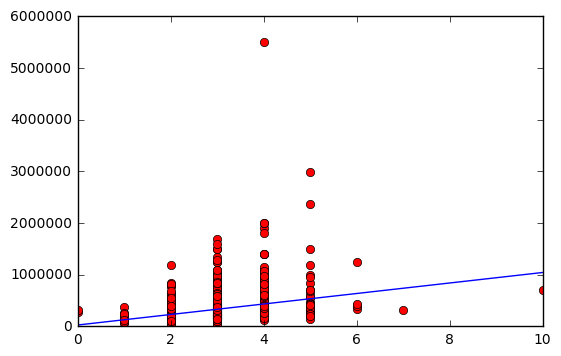

In [33]:
# The Bedrooms data is used for the learning algorithm
# Newley calculated theta is a slight improvement
x = Houses.Bedrooms

theta = np.array([100,10000])
alpha = 0.001

oldCost = costFunction(x,y,theta)
print "Old cost: "
print oldCost


for i in range(200):
    theta = updateVec(alpha, theta, x, y)
    # Use regular function for iterative computation
    # theta = update(alpha, theta, x ,y)

newCost = costFunction(x,y,theta)
print "New cost: "
print newCost

print "Improvement ratio: "
print oldCost/newCost

xNew = np.arange(0, (max(x)+1))

yNew = theta[0] + (theta[1]*xNew)

plt.plot(x, y, 'ro')
plt.plot(xNew, yNew)
plt.show()
    


Old cost: 
124053739066
New cost: 
48174319114.2
Improvement ratio: 
2.57510103614


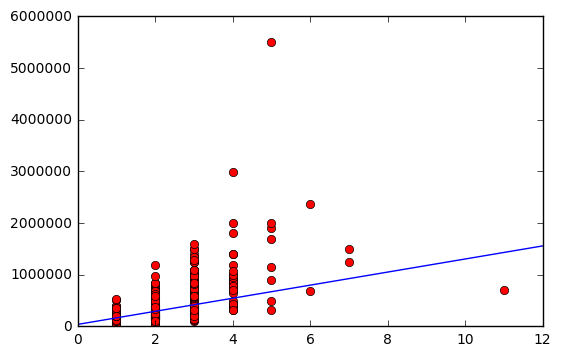

In [34]:
# The Bathrooms data is used for the learning algorithm
# Newley calculated theta is a slight improvement

x = Houses.Bathrooms

theta = np.array([0,10000])
alpha = 0.001

oldCost = costFunction(x,y,theta)
print "Old cost: "
print oldCost

for i in range(250):
    theta = updateVec(alpha, theta, x, y)
    # Use regular function for iterative computation
    # theta = update(alpha, theta, x ,y)

newCost = costFunction(x,y,theta)
print "New cost: "
print newCost

print "Improvement ratio: "
print oldCost/newCost


xNew = np.arange(0, max(x)+2)

yNew = theta[0] + (theta[1]*xNew)

plt.plot(x, y, 'ro')
plt.plot(xNew, yNew)
plt.show()

Old cost: 
133445607189
New cost: 
35107208521.9
Improvement ratio: 
3.80108851736


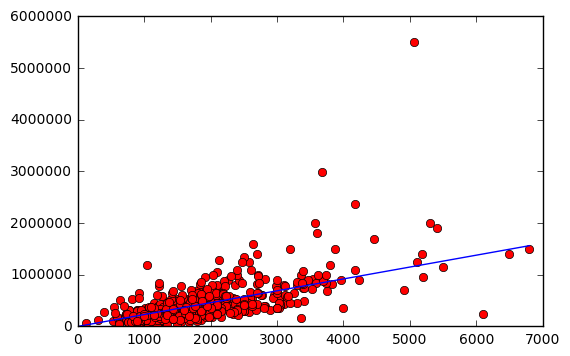

In [37]:
# The Sizes data is used for the learning algorithm
# Newley calculated theta has clearly more improved 
# than with the other two datasets

x = Houses.Size

theta = np.array([0,1])
alpha = 0.00000001

oldCost = costFunction(x,y,theta)
print "Old cost: "
print oldCost

for i in range(200):
    theta = updateVec(alpha, theta, x, y)
    # Use tregular function for iterative computation
    # theta = update(alpha, theta, x ,y)

newCost = costFunction(x,y,theta)
print "New cost: "
print newCost

print "Improvement ratio: "
print oldCost/newCost

# x and y as function of theta and x
xNew = np.arange(0, max(x))
yNew = theta[0] + (theta[1]*xNew)

plt.plot(x, y, 'ro')
plt.plot(xNew, yNew)
plt.show()